# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and visualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# pd.read_csv('case_study.csv')

In [174]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [175]:
pd.options.display.max_columns = None

In [176]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELLFON4,LADULT,NUMADULT,NUMMEN,NUMWOMEN,SAFETIME,CTELNUM1,CELLFON5,CADULT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,BPHIGH4,BPMEDS,CHOLCHK1,TOLDHI2,CHOLMED1,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3,DIABAGE2,LMTJOIN3,ARTHDIS2,ARTHSOCL,JOINPAI1,SEX,MARITAL,EDUCA,RENTHOM1,NUMHHOL2,NUMPHON2,CPDEMO1A,VETERAN3,EMPLOY1,CHILDREN,INCOME2,INTERNET,WEIGHT2,HEIGHT3,PREGNANT,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,SMOKDAY2,STOPSMK2,LASTSMK2,USENOW3,ECIGARET,ECIGNOW,ALCDAY5,AVEDRNK2,DRNK3GE5,MAXDRNKS,FRUIT2,FRUITJU2,FVGREEN1,FRENCHF1,POTATOE1,VEGETAB2,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,STRENGTH,SEATBELT,FLUSHOT6,FLSHTMY2,PNEUVAC3,SHINGLE2,HIVTST6,HIVTSTD3,HIVRISK5,PDIABTST,PREDIAB1,INSULIN,BLDSUGAR,FEETCHK2,DOCTDIAB,CHKHEMO3,FEETCHK,EYEEXAM,DIABEYE,DIABEDU,COPDCOGH,COPDFLEM,COPDBRTH,COPDBTST,COPDSMOK,HAREHAB1,STREHAB1,CVDASPRN,ASPUNSAF,RLIVPAIN,RDUCHART,RDUCSTRK,BPEATHBT,BPSALT,BPALCHOL,BPEXER,BPEATADV,BPSLTADV,BPALCADV,BPEXRADV,BPMEDADV,BPHI2MR,ARTTODAY,ARTHWGT,ARTHEXER,ARTHEDU,ASTHMAGE,ASATTACK,ASERVIST,ASDRVIST,ASRCHKUP,ASACTLIM,ASYMPTOM,ASNOSLEP,ASTHMED3,ASINHALR,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIM1,ADSLEEP,SLEPDAY1,SLEPSNO2,SLEPBRTH,MEDICARE,HLTHCVR1,DELAYMED,DLYOTHER,NOCOV121,LSTCOVRG,DRVISITS,MEDSCOS1,CARERCVD,MEDBILL1,ASBIALCH,ASBIDRNK,ASBIBING,ASBIADVC,ASBIRDUC,CNCRDIFF,CNCRAGE,CNCRTYP1,CSRVTRT2,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL1,SSBSUGR2,SSBFRUT3,WTCHSALT,DRADVISE,MARIJANA,USEMRJN1,RSNMRJNA,PFPPRVN2,TYPCNTR7,NOBCUSE6,IMFVPLAC,HPVADVC2,HPVADSHT,TETANUS,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSCN,CAREGIV1,CRGVREL2,CRGVLNG1,CRGVHRS1,CRGVPRB2,CRGVPERS,CRGVHOUS,CRGVMST2,CRGVEXPT,CIMEMLOS,CDHOUSE,CDASSIST,CDHELP,CDSOCIAL,CDDISCUS,EMTSUPRT,LSATISFY,SDHBILLS,SDHMOVE,HOWSAFE1,SDHFOOD,SDHMEALS,SDHMONEY,SDHSTRES,SXORIENT,TRNSGNDR,FIREARM4,GUNLOAD,LOADULK2,RCSGENDR,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,_CPRACE,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HCVU651,_RFHYPE5,_CHOLCH1,_RFCHOL1,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR1,_LMTACT1,_LMTWRK1,_LMTSCL1,_PRACE1,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACE_G1,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG,_SMOKER3,_RFSMOK3,_ECIGSTS,_CURECIG,DRNKANY5,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,FTJUDA2_,FRUTDA2_,GRENDA1_,FRNCHDA_,POTADA1_,VEGEDA2_,_MISFRT1,_MISVEG1,_FRTRES1,_VEGRES1,_FRUTSU1,_VEGESU1,_FRTLT1A,_VEGLT1A,_FRT16A,_VEG23A,_FRUITE1,_VEGETE1,_TOTINDA,METVL11_,METVL21_,MAXVO2_,FC60_,ACTIN11_,ACTIN21_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC11,_MINAC21,STRFREQ_,PAMISS1_,PAMIN11_,PAMIN21_,PA1MIN_,PAVIG11_,PAVIG21_,PA1VIGM_,_PACAT1,_PAINDX1,_PA150R2,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,3.0,88.0,2.0,88.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,6.0,2.0,NaN,NaN,NaN,2.0,1.0,88.0,7.0,1.0,160.0,502.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,3.0,2.0,NaN,101.0,5.0,88.0,2.0,301.0,202.0,305.0,202.0,303.0,306.0,1.0,67.0,203.0,100.0,55.0,201.0,100.0,204.0,1.0,2.0,NaN,2.0,NaN,1.0,42016.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [177]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 358)

In [178]:
df._STATE.unique()

array([ 9., 34., 36.])

In [179]:
df['PHYSHLTH'].value_counts()

88.0    21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [180]:
# your code here
df = df[df['_STATE'].isin([9,34,36])]

Now check to see how large our subset df.

In [181]:
# your code here
df.shape

(34545, 358)

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [182]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [183]:
#dropping Don't know/Not sure and Refused to answer values
df.PHYSHLTH = df.PHYSHLTH.replace({88:0, 77:np.nan, 99:np.nan})

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [184]:
# descriptive statistics
df.PHYSHLTH.describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

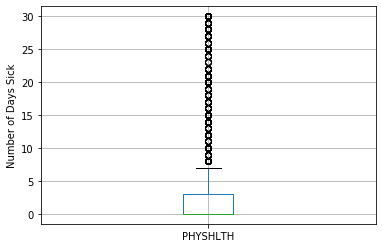

In [185]:
df.boxplot('PHYSHLTH')
plt.ylabel('Number of Days Sick')
plt.xlabel('')
plt.show()


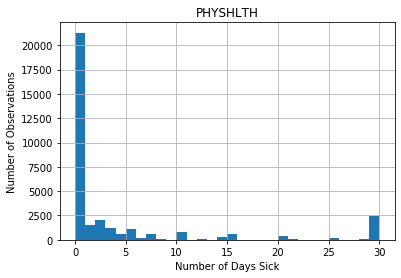

In [186]:
# graphic the distribution of data
df.hist('PHYSHLTH', bins = 30)
plt.ylabel('Number of Observations')
plt.xlabel('Number of Days Sick')
plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [187]:
# code to calculate the average number of sick days by state
means = df.groupby('_STATE').PHYSHLTH.mean()
means

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

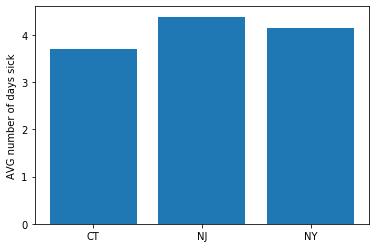

In [188]:
# code to graph those averages using matplotlib
Y = means
X = ['CT', 'NJ', 'NY']

plt.bar(X, Y)
plt.ylabel("AVG number of days sick")
plt.show()

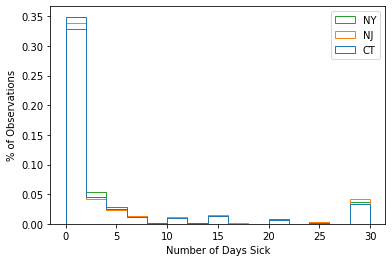

In [189]:
# graphic showing the histogram of data
x1 = df[df._STATE == 9].PHYSHLTH
x2 = df[df._STATE == 34].PHYSHLTH
x3 = df[df._STATE == 36].PHYSHLTH

plt.hist([x1, x2, x3], label = ['CT', 'NJ', 'NY'], density = True, histtype = 'step', bins = 15)
plt.legend()
plt.xlabel("Number of Days Sick")
plt.ylabel("% of Observations")
plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [190]:
# code to create new colum for chronically sick
# subset at 2 weeks
df['chron'] = np.where(df['PHYSHLTH'] > 14, 1, 0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [191]:
# code to calculate averages per state
chron_p = df.groupby('_STATE').agg({'chron': 'mean'})
chron_p

,chron
_STATE,
9.0,0.101719
34.0,0.124616
36.0,0.112417


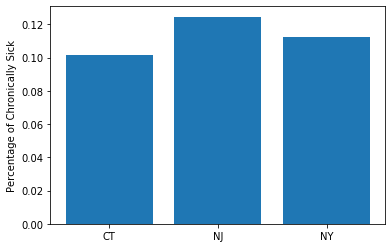

In [192]:
# create graphic to compare chronically sick by state
# states = ['CT', 'NJ', 'NY']

Y = chron_p.chron
X = list(map(lambda x: str(x), chron_p.index)) # or just use states

plt.bar(X, Y)
plt.xticks(X, ('CT', 'NJ', 'NY'))
plt.ylabel("Percentage of Chronically Sick")
plt.show()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [193]:
# If SMOKDAY2 is missing 
# & if SMOKE100 is 2 : Non-Smoker
# 7 : Don't know
# 9 : Refused
cond = [
    df.SMOKDAY2.isnull() & df.SMOKE100.eq(2), 
    df.SMOKDAY2.isnull() & df.SMOKE100.eq(7), 
    df.SMOKDAY2.isnull() & df.SMOKE100.eq(9)
]

vals = [3, 7, 9]
df['smoker'] = np.select(cond, vals, default = df.SMOKDAY2)
df.smoker.value_counts()

3.0    28790
1.0     2676
2.0     1371
7.0      180
9.0       78
Name: smoker, dtype: int64

In [194]:
smokers_v = df.smoker.value_counts(normalize= True)
smokers_v

3.0    0.869920
1.0    0.080858
2.0    0.041426
7.0    0.005439
9.0    0.002357
Name: smoker, dtype: float64

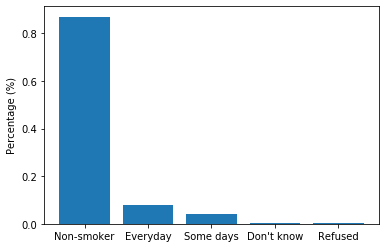

In [195]:
# code to graph those proportion of differen smoking groups using matplotlib
Y = smokers_v
X = ['Non-smoker', 'Everyday', 'Some days', "Don't know", "Refused"]
#smokers_v.index.astype(str)

plt.bar(X, Y)
#plt.xticks(X, ('Non-smoker', 'Everyday', 'Some days', "Don't know", "Refused"))
plt.ylabel("Percentage (%)")
plt.show()

In [196]:
# your code here
smoker_by_state = df.groupby('smoker')._STATE.value_counts()
smoker_by_state

smoker  _STATE
1.0     36.0      1036
        34.0       927
        9.0        713
2.0     36.0       536
        34.0       484
        9.0        351
3.0     36.0      9983
        34.0      9799
        9.0       9008
7.0     34.0        79
        9.0         70
        36.0        31
9.0     36.0        34
        9.0         29
        34.0        15
Name: _STATE, dtype: int64

In [197]:
tmp = smoker_by_state.unstack()
tmp

_STATE,9.0,34.0,36.0
smoker,,,
1.0,713,927,1036
2.0,351,484,536
3.0,9008,9799,9983
7.0,70,79,31
9.0,29,15,34


In [198]:
tmp = tmp.div(tmp.sum(axis = 0), axis = 1)
tmp

_STATE,9.0,34.0,36.0
smoker,,,
1.0,0.070101,0.082006,0.089157
2.0,0.034510,0.042817,0.046127
3.0,0.885655,0.866861,0.859122
7.0,0.006882,0.006989,0.002668
9.0,0.002851,0.001327,0.002926


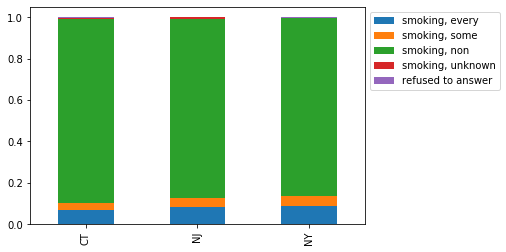

In [199]:
#graph showing the breakdown of smokers per state
tmp.T.plot(kind = 'bar', stacked = True)

plt.legend(['smoking, every', 'smoking, some', 'smoking, non', 'smoking, unknown', 
            'refused to answer'], bbox_to_anchor=(1, 1))

plt.xticks([0, 1, 2], ['CT', 'NJ', 'NY'])

plt.xlabel('')

plt.show()

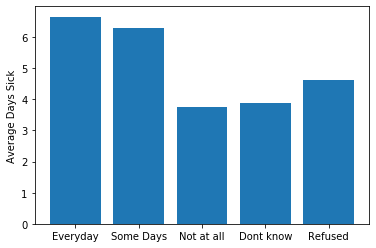

In [200]:
# code to graph these averages sick days for each category of smoking status
per_smoker = df.groupby('smoker').PHYSHLTH.mean()
Y = per_smoker
X = per_smoker.index.astype('str')

plt.bar(X, Y)
plt.xticks(X, ('Everyday', 'Some Days', 'Not at all', 'Dont know', 'Refused'))
plt.ylabel("Average Days Sick")
plt.show()

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [201]:
# code here to clean up the ALCDAY5 responses
#dropping Don't know/Not sure and Refused to answer values
df.ALCDAY5 = df.ALCDAY5.replace({888:0, 777:np.nan, 999:np.nan})

In [202]:
# take the last two values
df.ALCDAY5 = np.where(df.ALCDAY5 > 200, df.ALCDAY5 - 200, 
         np.where(df.ALCDAY5 > 100, (df.ALCDAY5 - 100)*4, df.ALCDAY5))

In [203]:
df.ALCDAY5.describe()

count    32212.000000
mean         5.295697
std          8.175906
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCDAY5, dtype: float64

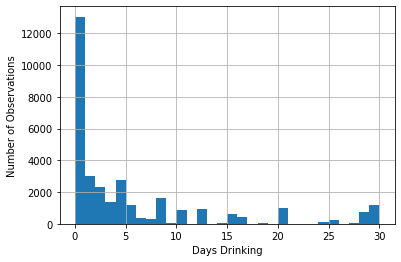

In [204]:
df.ALCDAY5.hist(bins = 30)
plt.xlabel("Days Drinking")
plt.ylabel("Number of Observations")
plt.show()

In [205]:
df.groupby('_STATE').ALCDAY5.mean()

_STATE
9.0     6.004043
34.0    4.887713
36.0    5.073933
Name: ALCDAY5, dtype: float64

In [206]:
state_alc = df[['ALCDAY5', 'PHYSHLTH']]
state_alc.corr(method = 'spearman')

,ALCDAY5,PHYSHLTH
ALCDAY5,1.000000,-0.116504
PHYSHLTH,-0.116504,1.000000


## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

In [259]:
import math
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.stats as sts
from statsmodels.formula.api import ols


TypeError: proportions_ztest() missing 2 required positional arguments: 'count' and 'nobs'

In [208]:
# mean of everyone in the sample
x_all = df.PHYSHLTH.mean()
# number of people
n_all = df.PHYSHLTH.count()
# sample std
s_all = df.PHYSHLTH.std()

In [209]:
upper = x_all + st.t.ppf(.975, n_all-1)* (s_all / math.sqrt(n_all))
lower = x_all - st.t.ppf(.975, n_all-1)* (s_all / math.sqrt(n_all))
print((round(upper, 2), round(lower, 2)))

(4.18, 3.99)


-  Create a 95% confidence interval for the true proportion of chronically sick people.

In [210]:
chronic_df = df[df.chron == 1]

In [211]:
# mean of chronically sick in the sample
x_chr = chronic_df.PHYSHLTH.mean()
# number of people
n_chr = chronic_df.PHYSHLTH.count()
# sample std
s_chr = chronic_df.PHYSHLTH.std()

In [212]:
upper = x_chr + st.t.ppf(.975, n_chr-1)* (s_chr / math.sqrt(n_chr))
lower = x_chr - st.t.ppf(.975, n_chr-1)* (s_chr / math.sqrt(n_chr))
print((round(upper, 2), round(lower, 2)))

(26.04, 25.67)


## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


#### 1. Probability of getting the sample mean for days physically ill, given population mean of 4
**H0:** $\mu = 4$  
**HA:** $\mu \neq 4$ 

We will use one-sample t-test here.
First setting up known parameters.  

In [276]:
physhlth = df[~df.PHYSHLTH.isnull()] # only non-null physhlth

In [278]:
# population mean
mu = 4 
# mean of everyone in the sample
x_all
# number of people
n_all
# sample std
s_all
# alpha level 
alpha = 0.05

In [279]:
t, p = st.ttest_1samp(physhlth[~physhlth.PHYSHLTH.isnull()].PHYSHLTH, mu)
print (f"(t = {round(t, 2)}, p = {round(p, 2)})")

(t = 1.84, p = 0.07)


With p > 0.05, we failed to reject the null.  
We don't have enough evidence to believe the difference between this sample and population is statistically significant.

#### 2. Difference between men and women in the number of days sick
**H0:** $\mu_m = \mu_f$  
**HA:** $\mu_m \neq \mu_f$ 

In [280]:
men_df = physhlth[physhlth.SEX == 1]
women_df = physhlth[physhlth.SEX == 2]

In [281]:
# testing for equal variance
men_df.PHYSHLTH.std()/women_df.PHYSHLTH.std()

0.9443750774592969

In [282]:
print(men_df.PHYSHLTH.mean())
print(women_df.PHYSHLTH.mean())

3.700971791064921
4.3852784093913595


In [283]:
t, p = st.ttest_ind(men_df.PHYSHLTH, women_df.PHYSHLTH, nan_policy = "omit")
print (f"(t = {round(t, 2)}, p = {round(p, 2)})")

(t = -7.33, p = 0.0)


We reject the null hypothesis.  
The number of days sick for men and for women are significantly different with p < 0.0001  

#### 3. Difference among three states
**H0:** $\mu_{CT} = \mu_{NY} = \mu_{NJ}$  
**HA:**  
H0 is not true, so :  
$\mu_{CT} \neq \mu_{NY}$ or  
$\mu_{CT} \neq \mu_{NJ}$ or  
$\mu_{NJ} \neq \mu_{NY}$ or  
$\mu_{CT} \neq \mu_{NY} \neq \mu_{NJ}$ 

### Assumptions
1. Normal distribution
2. Homogeneity of variance
3. Independent observations


Below is ANOVA but it doesn't make sense to run it since data are not normal so I'll use Kruskal Wallis type of rank order analysis.

In [307]:
CT_df = physhlth[physhlth._STATE == 9]
NJ_df = physhlth[physhlth._STATE == 34]
NY_df = physhlth[physhlth._STATE == 36]


In [242]:
# ANOVA using scipy toolkit
f, p = st.f_oneway(CT_df.PHYSHLTH, NJ_df.PHYSHLTH, NY_df.PHYSHLTH)
print (f"(F = {round(f, 2)}, p = {round(p, 2)})")

(F = 18.56, p = 0.0)


In [ ]:
# ANOVA using statsmodels toolkit
fit_ = ols('PHYSHLTH ~ C(_STATE)', data = physhlth).fit() # must add C for categorical IV
fit_.summary() # skew and kurtosis are high, so it does not seem to meet the assumption of normality 
#sm.stats.anova_lm(fit_, type = 2)

In [310]:
st.kruskal(CT_df.PHYSHLTH, NJ_df.PHYSHLTH, NY_df.PHYSHLTH)

KruskalResult(statistic=43.37827809723158, pvalue=3.8065066597080046e-10)

We reject the null, there are statistically significant difference in number of days sick between different states.

### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

#### 1. Probability of drawing current chronic population when true pop.prop is 0.10


In [299]:
physhlth # non-null df

n = len(physhlth)
pp = 0.10 # population probability
p = sum(physhlth.chron)/len(physhlth) # sample probability
SE = np.sqrt((p * (1-p))/n)
z_st = (p - pp)/SE
st.norm.sf(z_st)

print(f"The probability of getting the current proportion of chronic conditions in the population is very low with p < 0.001 and z* = {round(z_st, 2)}.")

The probability of getting the current proportion of chronic conditions in the population is very low with p < 0.001 and z* = 9.15.


In [264]:
# using statsmodels
sts.proportion.proportions_ztest(count = sum(physhlth.chron), nobs = len(physhlth), value = 0.1)

(9.152322162456334, 5.57226247923435e-20)

#### 2. Difference in chronic population between men and women

In [304]:
# men_df, women_df
# two-sample z-test of proportion
n1 = len(men_df) # sample size of men
n2 = len(women_df) # sample size of women

p1 = sum(men_df.chron)/n1 # proportion of chronic in men
p2 = sum(women_df.chron)/n2 # proportion of chronic in women

poop = (sum(men_df.chron)+sum(women_df.chron))/(n1+n2) # pooled proportion
numer = p1 - p2
denom = np.sqrt(poop*(1-poop)*((1/n1)+(1/n2)))

z_st = numer/denom

st.norm.sf(np.abs(z_st))
print(f"Difference in proportion is significant in men and women with p < 0.0001 and z* = {round(z_st, 2)}.")

Difference in proportion is significant in men and women with p < 0.0001 and z* = -5.82.


In [306]:
sts.proportion.proportions_ztest(count = sum(physhlth.chron), nobs = len(physhlth), value = 0.1)

(9.152322162456334, 5.57226247923435e-20)

#### 3. Difference across states

IV = states (categorical 3 groups)  
DV = proportion of people chronically ill (think two categories: sick and not sick)  
We will use chi-squared test.

In [318]:
# making contingency table
tmp = physhlth.groupby('_STATE').chron.value_counts()
table = np.array(tmp.unstack())

In [320]:
stat, p, df, expected = st.chi2_contingency(table)

In [ ]:
# alpha = 0.05
# prob = 1 - alpha
# critical = chi2.ppf(prob, df)

In [322]:
p

2.485925315070811e-07

We reject the null hypothesis. (p < 0.0001) There are statistically significant difference in proportion of sick people between three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.